In [ ]:
import tarfile
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



Using device: cpu
Files already downloaded and verified
Files already downloaded and verified


c:\Users\vidhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vidhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



Training ResNet-18:
Epoch 1/10, Loss: 1.3350, Accuracy: 51.53%, Val Loss: 1.1576, Val Accuracy: 60.49%
Epoch 2/10, Loss: 0.8395, Accuracy: 70.67%, Val Loss: 0.8613, Val Accuracy: 70.24%
Epoch 3/10, Loss: 0.6223, Accuracy: 78.33%, Val Loss: 0.6771, Val Accuracy: 76.89%
Epoch 4/10, Loss: 0.4837, Accuracy: 83.28%, Val Loss: 0.6185, Val Accuracy: 78.76%
Epoch 5/10, Loss: 0.3618, Accuracy: 87.47%, Val Loss: 0.5905, Val Accuracy: 81.11%
Epoch 6/10, Loss: 0.2613, Accuracy: 90.81%, Val Loss: 0.5768, Val Accuracy: 81.80%
Epoch 7/10, Loss: 0.1780, Accuracy: 93.63%, Val Loss: 0.6542, Val Accuracy: 81.21%
Epoch 8/10, Loss: 0.1314, Accuracy: 95.46%, Val Loss: 0.6850, Val Accuracy: 81.29%
Epoch 9/10, Loss: 0.1026, Accuracy: 96.41%, Val Loss: 0.7393, Val Accuracy: 81.64%
Epoch 10/10, Loss: 0.0777, Accuracy: 97.27%, Val Loss: 0.7551, Val Accuracy: 82.60%


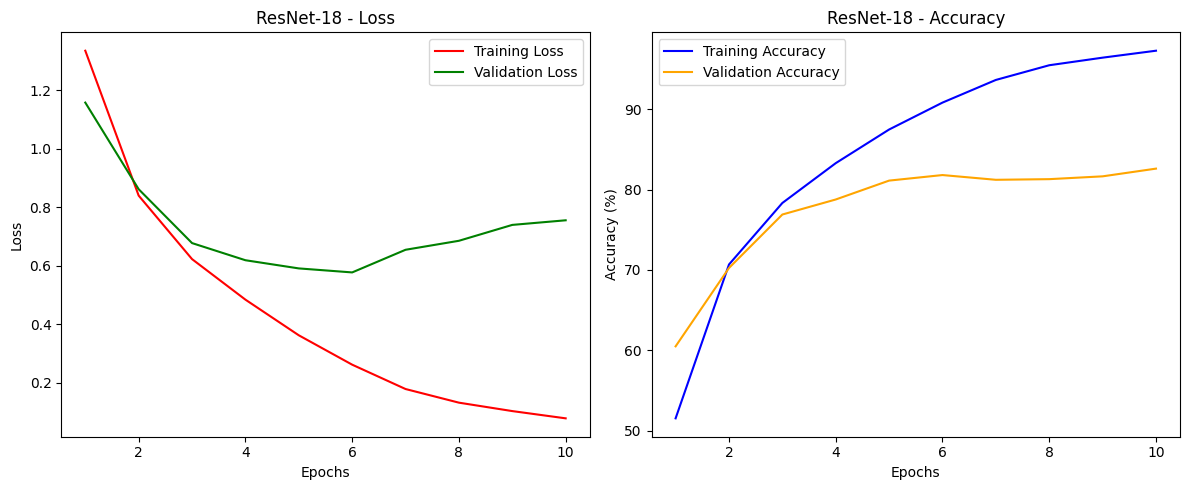


Training SqueezeNet:
Epoch 1/10, Loss: 2.3042, Accuracy: 10.42%, Val Loss: 2.3026, Val Accuracy: 10.00%
Epoch 2/10, Loss: 2.3026, Accuracy: 9.99%, Val Loss: 2.3026, Val Accuracy: 10.00%
Epoch 3/10, Loss: 2.3026, Accuracy: 10.08%, Val Loss: 2.3141, Val Accuracy: 10.00%
Epoch 4/10, Loss: 2.3026, Accuracy: 10.02%, Val Loss: 2.3026, Val Accuracy: 10.00%
Epoch 5/10, Loss: 2.3026, Accuracy: 9.92%, Val Loss: 2.3026, Val Accuracy: 10.00%
Epoch 6/10, Loss: 2.3026, Accuracy: 10.03%, Val Loss: 2.3026, Val Accuracy: 10.00%
Epoch 7/10, Loss: 2.3026, Accuracy: 9.99%, Val Loss: 2.3026, Val Accuracy: 10.00%
Epoch 8/10, Loss: 2.3026, Accuracy: 10.00%, Val Loss: 2.3026, Val Accuracy: 10.00%
Epoch 9/10, Loss: 2.3026, Accuracy: 10.00%, Val Loss: 2.3026, Val Accuracy: 10.00%
Epoch 10/10, Loss: 2.3026, Accuracy: 10.00%, Val Loss: 2.3026, Val Accuracy: 10.00%


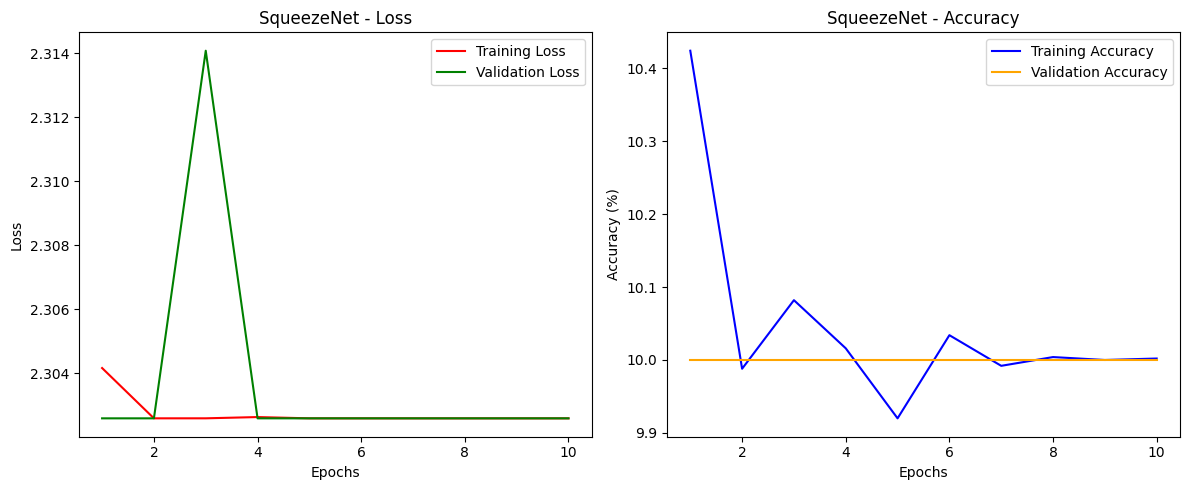


Training AlexNet:
Epoch 1/10, Loss: 1.8613, Accuracy: 28.87%, Val Loss: 1.6356, Val Accuracy: 39.24%
Epoch 2/10, Loss: 1.5855, Accuracy: 41.10%, Val Loss: 1.4756, Val Accuracy: 45.79%
Epoch 3/10, Loss: 1.4739, Accuracy: 45.96%, Val Loss: 1.4984, Val Accuracy: 45.52%
Epoch 4/10, Loss: 1.4153, Accuracy: 48.53%, Val Loss: 1.3554, Val Accuracy: 51.20%
Epoch 5/10, Loss: 1.3696, Accuracy: 50.64%, Val Loss: 1.4026, Val Accuracy: 49.11%
Epoch 6/10, Loss: 1.3149, Accuracy: 52.86%, Val Loss: 1.3049, Val Accuracy: 53.43%
Epoch 7/10, Loss: 1.2864, Accuracy: 54.18%, Val Loss: 1.2598, Val Accuracy: 54.52%
Epoch 8/10, Loss: 1.2632, Accuracy: 55.21%, Val Loss: 1.3017, Val Accuracy: 54.77%
Epoch 9/10, Loss: 1.2287, Accuracy: 56.66%, Val Loss: 1.2597, Val Accuracy: 54.74%
Epoch 10/10, Loss: 1.2111, Accuracy: 57.23%, Val Loss: 1.2125, Val Accuracy: 57.02%


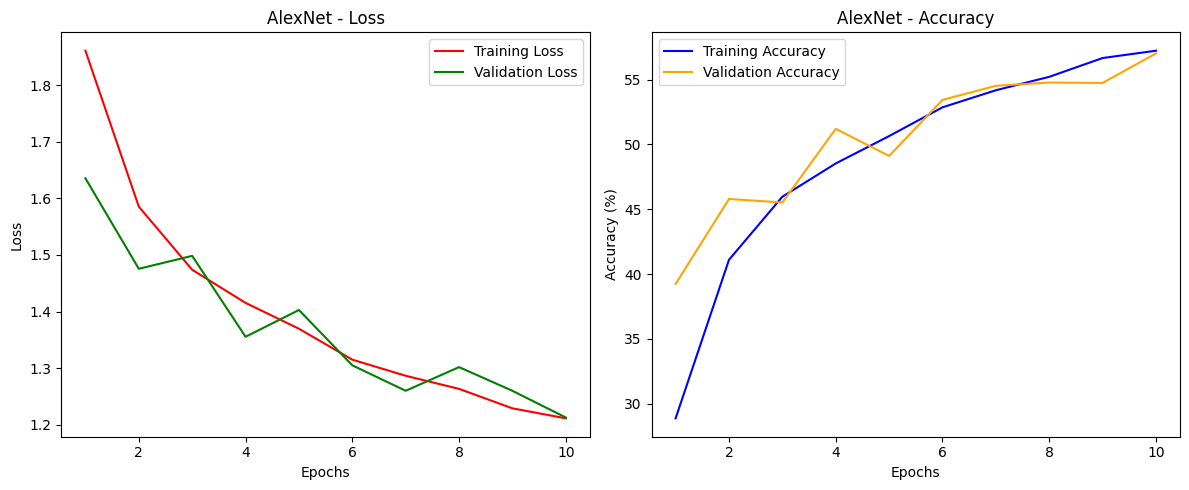

In [ ]:


# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Data loading and preprocessing
transform = transforms.Compose([
    transforms.Resize(128),  # Resize to 128x128 for quicker training
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Function to train a model and record training and validation history
def train_model(model, epochs=10):  # Increased epochs to 10
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100 * correct / total
        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_acc)

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_epoch_loss = val_loss / len(testloader)
        val_epoch_acc = 100 * correct / total
        val_loss_history.append(val_epoch_loss)
        val_acc_history.append(val_epoch_acc)

        print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%, '
              f'Val Loss: {val_epoch_loss:.4f}, Val Accuracy: {val_epoch_acc:.2f}%')

    return train_loss_history, train_acc_history, val_loss_history, val_acc_history

# Updated plotting function
def plot_curves(train_loss, train_acc, val_loss, val_acc, model_name):
    epochs = range(1, len(train_loss) + 1)
    plt.figure(figsize=(12, 5))

    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'g', label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Baseline models
models_to_train = {
    "ResNet-18": models.resnet18(pretrained=False),
    "SqueezeNet": models.squeezenet1_0(pretrained=False),
    "AlexNet": models.alexnet(pretrained=False)
}

# Adjust final layers for CIFAR-10 (10 classes)
models_to_train["ResNet-18"].fc = nn.Linear(512, 10)
models_to_train["SqueezeNet"].classifier[1] = nn.Conv2d(512, 10, kernel_size=(1, 1))
models_to_train["AlexNet"].classifier[6] = nn.Linear(4096, 10)

# Training each model and plotting curves
for model_name, model in models_to_train.items():
    print(f"\nTraining {model_name}:")
    train_loss, train_acc, val_loss, val_acc = train_model(model, epochs=10)  # Increased epochs to 10
    plot_curves(train_loss, train_acc, val_loss, val_acc, model_name)


Using device: cpu
Files already downloaded and verified
Files already downloaded and verified

Hyperparameter tuning for ResNet-18:

Training ResNet-18 with Adam optimizer and learning rate 0.001
Epoch 1/10, Train Loss: 1.3562, Train Accuracy: 50.74%, Val Loss: 1.0122, Val Accuracy: 64.08%
Epoch 2/10, Train Loss: 0.8431, Train Accuracy: 70.38%, Val Loss: 0.7796, Val Accuracy: 73.33%
Epoch 3/10, Train Loss: 0.6312, Train Accuracy: 77.87%, Val Loss: 0.5988, Val Accuracy: 79.37%
Epoch 4/10, Train Loss: 0.4831, Train Accuracy: 83.26%, Val Loss: 0.6360, Val Accuracy: 78.55%
Epoch 5/10, Train Loss: 0.3662, Train Accuracy: 87.34%, Val Loss: 0.5612, Val Accuracy: 81.84%
Epoch 6/10, Train Loss: 0.2594, Train Accuracy: 90.99%, Val Loss: 0.5925, Val Accuracy: 81.77%
Epoch 7/10, Train Loss: 0.1791, Train Accuracy: 93.74%, Val Loss: 0.6615, Val Accuracy: 81.43%
Epoch 8/10, Train Loss: 0.1261, Train Accuracy: 95.55%, Val Loss: 0.6434, Val Accuracy: 82.74%
Epoch 9/10, Train Loss: 0.1004, Train Accura

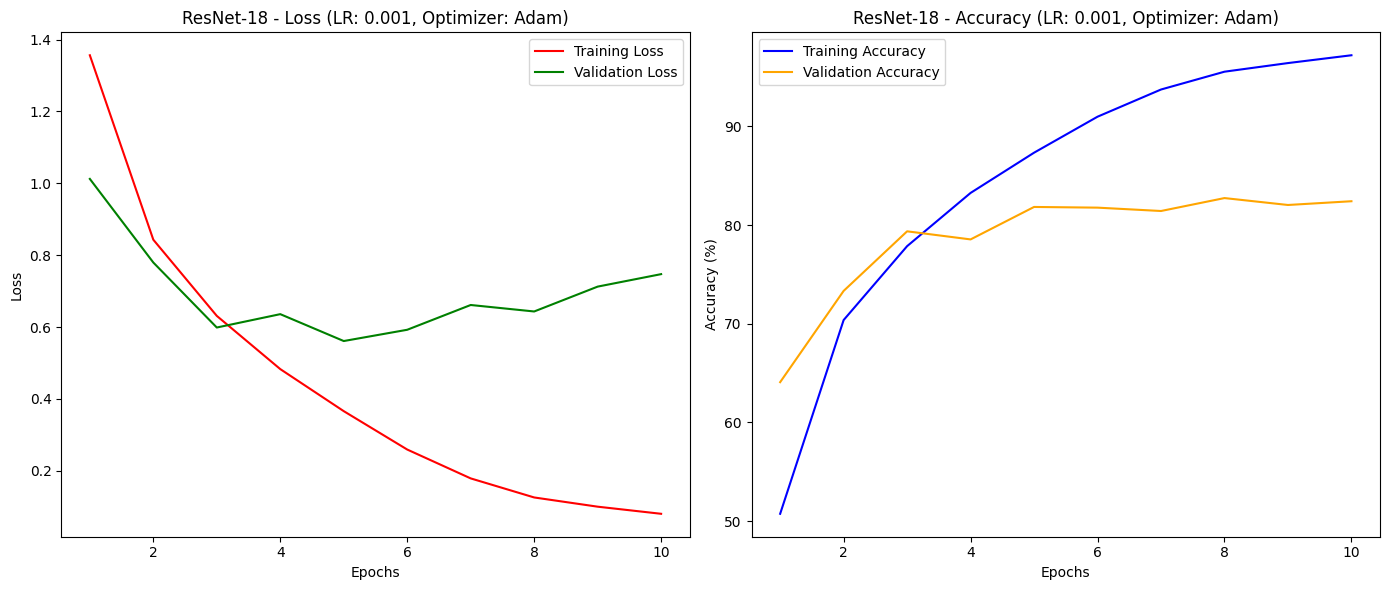


Training ResNet-18 with SGD optimizer and learning rate 0.001
Epoch 1/10, Train Loss: 1.5513, Train Accuracy: 42.82%, Val Loss: 1.2746, Val Accuracy: 53.01%
Epoch 2/10, Train Loss: 1.1323, Train Accuracy: 59.32%, Val Loss: 1.0380, Val Accuracy: 63.18%
Epoch 3/10, Train Loss: 0.8919, Train Accuracy: 68.32%, Val Loss: 0.9356, Val Accuracy: 66.59%
Epoch 4/10, Train Loss: 0.7163, Train Accuracy: 74.84%, Val Loss: 0.8683, Val Accuracy: 69.56%
Epoch 5/10, Train Loss: 0.5636, Train Accuracy: 80.33%, Val Loss: 0.7864, Val Accuracy: 73.33%
Epoch 6/10, Train Loss: 0.4146, Train Accuracy: 85.88%, Val Loss: 0.8253, Val Accuracy: 72.90%
Epoch 7/10, Train Loss: 0.2880, Train Accuracy: 90.29%, Val Loss: 0.9599, Val Accuracy: 71.59%
Epoch 8/10, Train Loss: 0.1966, Train Accuracy: 93.54%, Val Loss: 0.9638, Val Accuracy: 73.39%
Epoch 9/10, Train Loss: 0.1291, Train Accuracy: 95.89%, Val Loss: 0.9200, Val Accuracy: 74.88%
Epoch 10/10, Train Loss: 0.0944, Train Accuracy: 96.97%, Val Loss: 1.0153, Val Acc

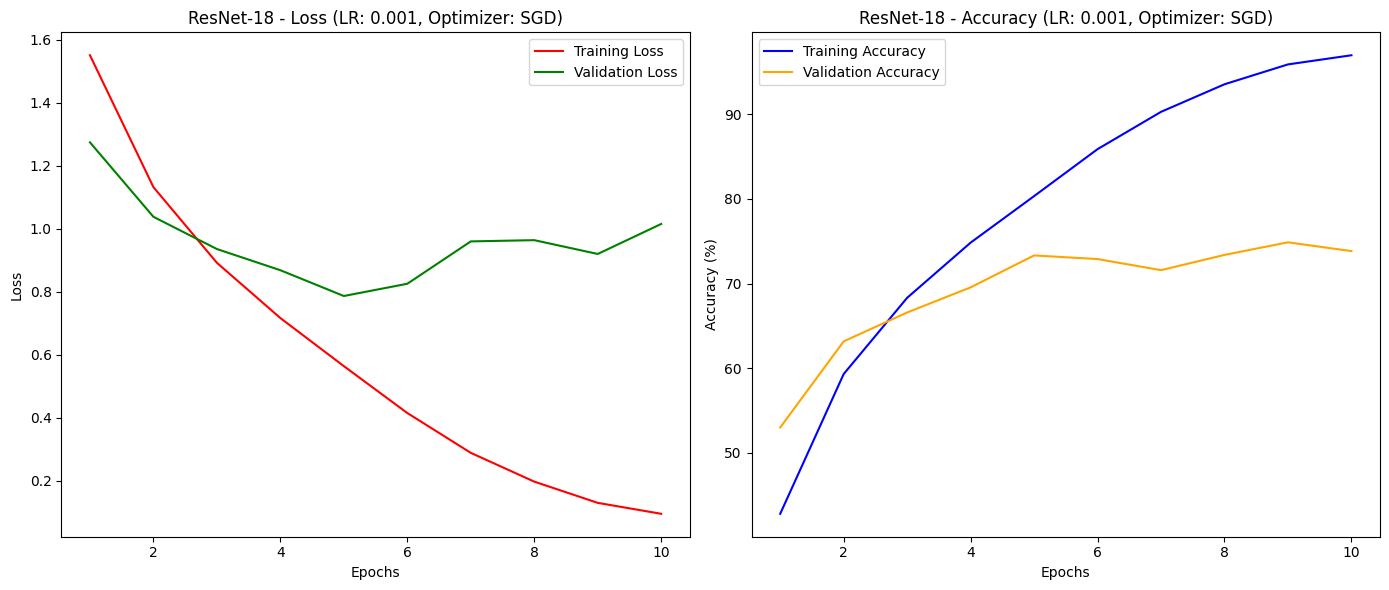


Training ResNet-18 with Adam optimizer and learning rate 0.0001
Epoch 1/10, Train Loss: 1.2542, Train Accuracy: 54.65%, Val Loss: 0.9534, Val Accuracy: 66.46%
Epoch 2/10, Train Loss: 0.7925, Train Accuracy: 72.24%, Val Loss: 0.7797, Val Accuracy: 72.86%
Epoch 3/10, Train Loss: 0.5714, Train Accuracy: 80.00%, Val Loss: 0.6529, Val Accuracy: 76.90%
Epoch 4/10, Train Loss: 0.3916, Train Accuracy: 86.46%, Val Loss: 0.6770, Val Accuracy: 78.05%
Epoch 5/10, Train Loss: 0.2513, Train Accuracy: 91.36%, Val Loss: 0.7041, Val Accuracy: 77.99%
Epoch 6/10, Train Loss: 0.1637, Train Accuracy: 94.50%, Val Loss: 0.8212, Val Accuracy: 77.07%
Epoch 7/10, Train Loss: 0.1222, Train Accuracy: 95.71%, Val Loss: 0.8718, Val Accuracy: 76.80%
Epoch 8/10, Train Loss: 0.1077, Train Accuracy: 96.43%, Val Loss: 0.7718, Val Accuracy: 79.02%
Epoch 9/10, Train Loss: 0.0889, Train Accuracy: 97.01%, Val Loss: 0.9039, Val Accuracy: 77.29%
Epoch 10/10, Train Loss: 0.0820, Train Accuracy: 97.25%, Val Loss: 0.8718, Val A

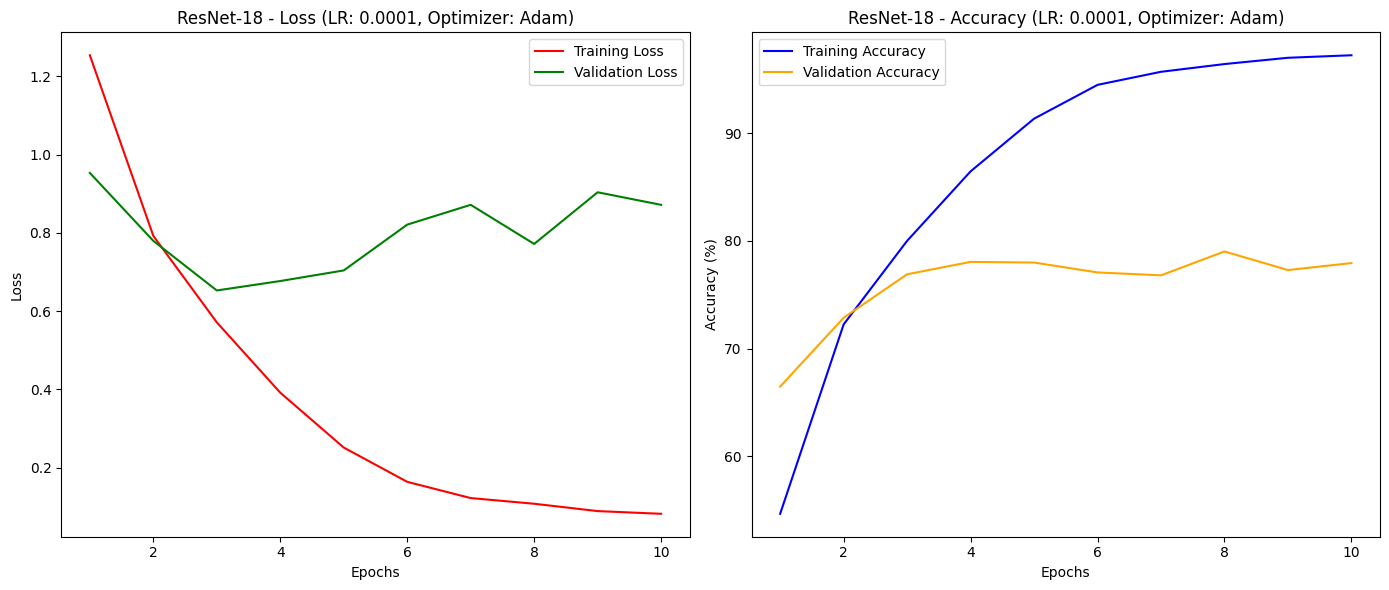


Training ResNet-18 with SGD optimizer and learning rate 0.0001
Epoch 1/10, Train Loss: 1.9609, Train Accuracy: 27.67%, Val Loss: 1.7359, Val Accuracy: 34.85%
Epoch 2/10, Train Loss: 1.6614, Train Accuracy: 38.50%, Val Loss: 1.5562, Val Accuracy: 42.58%
Epoch 3/10, Train Loss: 1.5161, Train Accuracy: 44.27%, Val Loss: 1.4179, Val Accuracy: 47.35%
Epoch 4/10, Train Loss: 1.4062, Train Accuracy: 48.64%, Val Loss: 1.3292, Val Accuracy: 50.98%
Epoch 5/10, Train Loss: 1.3194, Train Accuracy: 52.19%, Val Loss: 1.2698, Val Accuracy: 53.77%
Epoch 6/10, Train Loss: 1.2456, Train Accuracy: 55.13%, Val Loss: 1.2215, Val Accuracy: 55.92%
Epoch 7/10, Train Loss: 1.1791, Train Accuracy: 57.73%, Val Loss: 1.1442, Val Accuracy: 58.50%
Epoch 8/10, Train Loss: 1.1200, Train Accuracy: 60.05%, Val Loss: 1.1328, Val Accuracy: 59.37%
Epoch 9/10, Train Loss: 1.0649, Train Accuracy: 62.18%, Val Loss: 1.0968, Val Accuracy: 61.08%
Epoch 10/10, Train Loss: 1.0107, Train Accuracy: 63.97%, Val Loss: 1.0257, Val Ac

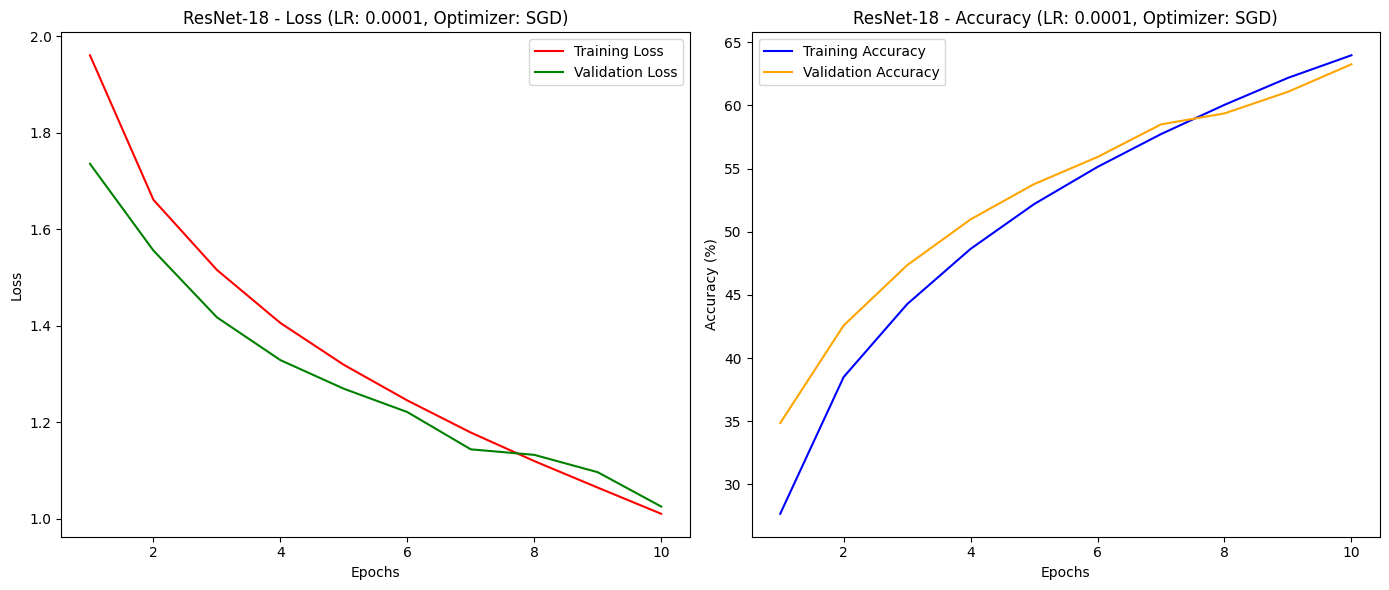


Best Hyperparameters for ResNet-18:
Optimizer: Adam, Learning Rate: 0.001
Best Validation Accuracy: 82.42%

Classification Report for ResNet-18:
              precision    recall  f1-score   support

    airplane       0.85      0.85      0.85      1000
  automobile       0.89      0.91      0.90      1000
        bird       0.76      0.76      0.76      1000
         cat       0.71      0.62      0.66      1000
        deer       0.79      0.80      0.79      1000
         dog       0.73      0.78      0.75      1000
        frog       0.84      0.89      0.86      1000
       horse       0.90      0.84      0.87      1000
        ship       0.93      0.88      0.91      1000
       truck       0.84      0.92      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



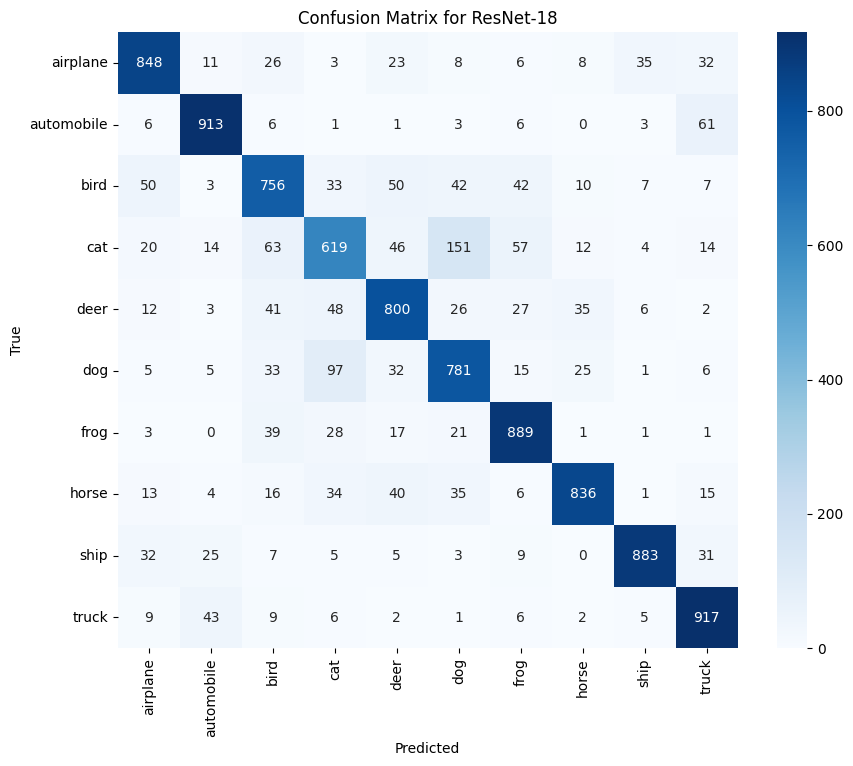

In [ ]:


# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Data loading and preprocessing
transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

learning_rates = [0.001, 0.0001]
optimizers = ['Adam', 'SGD']
best_accuracy = 0.0
best_model = None
best_params = {}

# Training function with validation
def train_model(model, optimizer_name, learning_rate, epochs=10):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate) if optimizer_name == 'Adam' else optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(trainloader)
        epoch_train_acc = 100 * correct / total
        train_loss_history.append(epoch_train_loss)
        train_acc_history.append(epoch_train_acc)

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_val_loss = val_loss / len(testloader)
        epoch_val_acc = 100 * correct / total
        val_loss_history.append(epoch_val_loss)
        val_acc_history.append(epoch_val_acc)

        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_acc:.2f}%, '
              f'Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_acc:.2f}%')

    return model, train_loss_history, train_acc_history, val_loss_history, val_acc_history

# Plotting function for training and validation history
def plot_curves(train_loss, train_acc, val_loss, val_acc, lr, optimizer_name):
    epochs = range(1, len(train_loss) + 1)
    plt.figure(figsize=(14, 6))

    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'g', label='Validation Loss')
    plt.title(f'ResNet-18 - Loss (LR: {lr}, Optimizer: {optimizer_name})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')
    plt.title(f'ResNet-18 - Accuracy (LR: {lr}, Optimizer: {optimizer_name})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Hyperparameter tuning for ResNet-18
print("\nHyperparameter tuning for ResNet-18:")
for lr in learning_rates:
    for opt in optimizers:
        print(f"\nTraining ResNet-18 with {opt} optimizer and learning rate {lr}")
        model = models.resnet18(pretrained=False)
        model.fc = nn.Linear(512, 10)  # Adjust final layer for CIFAR-10
        trained_model, train_loss, train_acc, val_loss, val_acc = train_model(model, opt, lr)

        if val_acc[-1] > best_accuracy:
            best_accuracy = val_acc[-1]
            best_model = trained_model
            best_params = {'optimizer': opt, 'learning_rate': lr}

        plot_curves(train_loss, train_acc, val_loss, val_acc, lr, opt)

print("\nBest Hyperparameters for ResNet-18:")
print(f"Optimizer: {best_params['optimizer']}, Learning Rate: {best_params['learning_rate']}")
print(f"Best Validation Accuracy: {best_accuracy:.2f}%")

# Evaluate the best model on the test set
best_model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Classification report
print("\nClassification Report for ResNet-18:")
print(classification_report(y_true, y_pred, target_names=testset.classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=testset.classes, yticklabels=testset.classes)
plt.title('Confusion Matrix for ResNet-18')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Using device: cpu
Files already downloaded and verified
Files already downloaded and verified

Hyperparameter tuning for SqueezeNet:

Training SqueezeNet with Adam optimizer and learning rate 0.001


c:\Users\vidhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vidhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 1.9843, Train Accuracy: 26.35%, Val Loss: 1.8310, Val Accuracy: 34.85%
Epoch 2/10, Train Loss: 1.5867, Train Accuracy: 41.71%, Val Loss: 1.4736, Val Accuracy: 45.01%
Epoch 3/10, Train Loss: 1.3752, Train Accuracy: 50.08%, Val Loss: 1.3079, Val Accuracy: 52.88%
Epoch 4/10, Train Loss: 1.2481, Train Accuracy: 54.98%, Val Loss: 1.1909, Val Accuracy: 57.46%
Epoch 5/10, Train Loss: 1.1524, Train Accuracy: 58.60%, Val Loss: 1.1579, Val Accuracy: 57.73%
Epoch 6/10, Train Loss: 1.0889, Train Accuracy: 60.93%, Val Loss: 1.0472, Val Accuracy: 62.69%
Epoch 7/10, Train Loss: 1.0298, Train Accuracy: 63.41%, Val Loss: 1.0247, Val Accuracy: 63.59%
Epoch 8/10, Train Loss: 0.9878, Train Accuracy: 64.92%, Val Loss: 0.9940, Val Accuracy: 64.91%
Epoch 9/10, Train Loss: 0.9454, Train Accuracy: 66.75%, Val Loss: 0.9529, Val Accuracy: 66.84%
Epoch 10/10, Train Loss: 0.9086, Train Accuracy: 67.65%, Val Loss: 0.9439, Val Accuracy: 66.90%


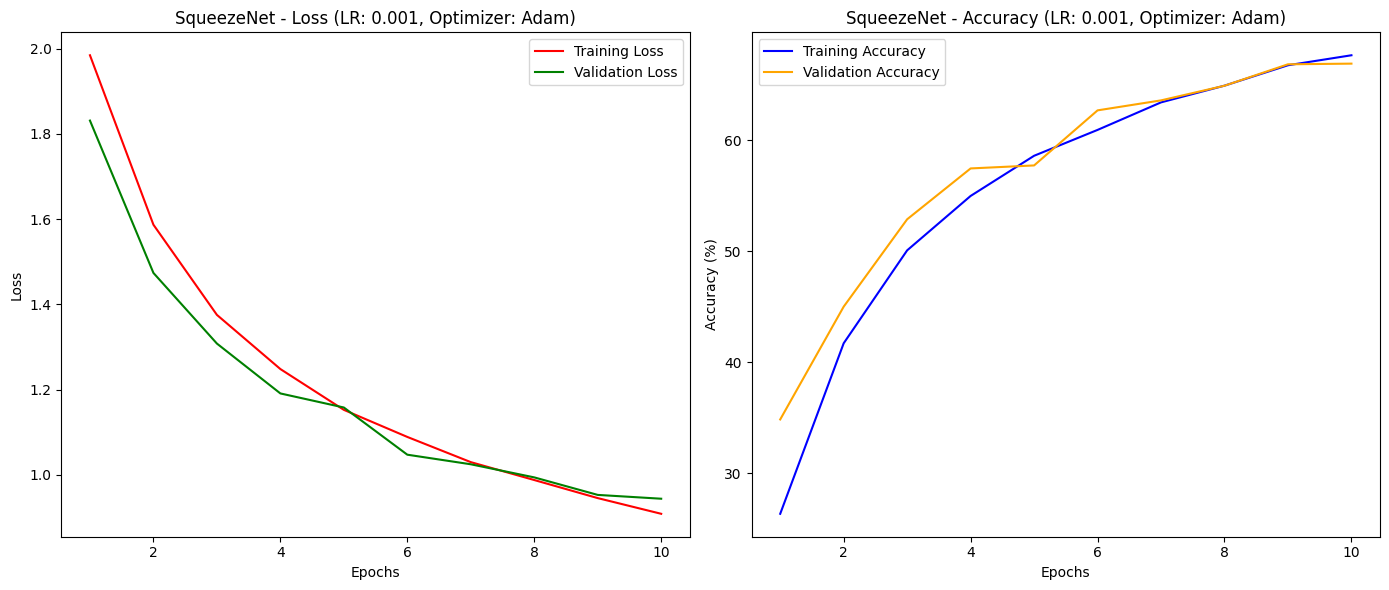


Training SqueezeNet with SGD optimizer and learning rate 0.001
Epoch 1/10, Train Loss: 1.9272, Train Accuracy: 27.06%, Val Loss: 1.6871, Val Accuracy: 36.54%
Epoch 2/10, Train Loss: 1.5970, Train Accuracy: 40.17%, Val Loss: 1.5310, Val Accuracy: 43.01%
Epoch 3/10, Train Loss: 1.4286, Train Accuracy: 47.26%, Val Loss: 1.3747, Val Accuracy: 48.36%
Epoch 4/10, Train Loss: 1.3060, Train Accuracy: 51.93%, Val Loss: 1.2221, Val Accuracy: 55.07%
Epoch 5/10, Train Loss: 1.2088, Train Accuracy: 56.11%, Val Loss: 1.2034, Val Accuracy: 56.55%
Epoch 6/10, Train Loss: 1.1377, Train Accuracy: 58.54%, Val Loss: 1.0758, Val Accuracy: 61.39%
Epoch 7/10, Train Loss: 1.0734, Train Accuracy: 61.16%, Val Loss: 1.0205, Val Accuracy: 63.19%
Epoch 8/10, Train Loss: 1.0327, Train Accuracy: 62.78%, Val Loss: 0.9976, Val Accuracy: 63.60%
Epoch 9/10, Train Loss: 0.9764, Train Accuracy: 65.03%, Val Loss: 0.9605, Val Accuracy: 65.69%
Epoch 10/10, Train Loss: 0.9370, Train Accuracy: 66.40%, Val Loss: 0.9973, Val Ac

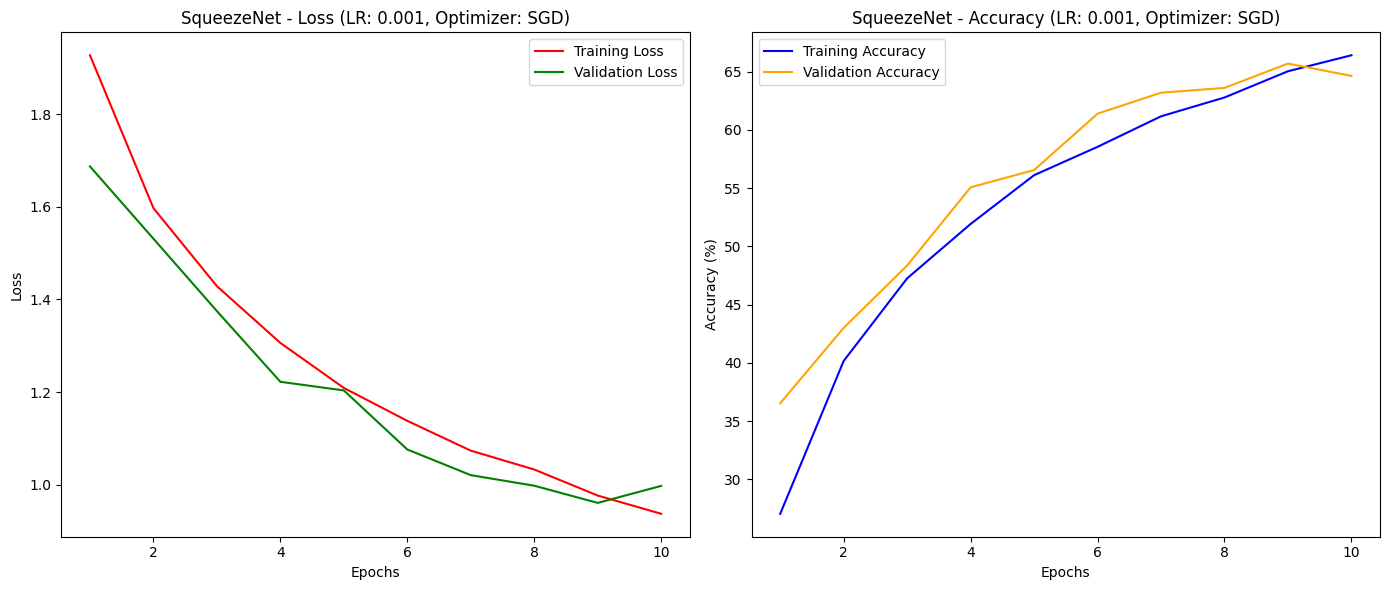


Training SqueezeNet with Adam optimizer and learning rate 0.0001
Epoch 1/10, Train Loss: 1.7425, Train Accuracy: 33.83%, Val Loss: 1.4525, Val Accuracy: 45.78%
Epoch 2/10, Train Loss: 1.4121, Train Accuracy: 47.96%, Val Loss: 1.3009, Val Accuracy: 51.60%
Epoch 3/10, Train Loss: 1.2482, Train Accuracy: 54.40%, Val Loss: 1.1761, Val Accuracy: 57.54%
Epoch 4/10, Train Loss: 1.1383, Train Accuracy: 58.77%, Val Loss: 1.1706, Val Accuracy: 57.47%
Epoch 5/10, Train Loss: 1.0599, Train Accuracy: 61.96%, Val Loss: 0.9895, Val Accuracy: 64.89%
Epoch 6/10, Train Loss: 0.9869, Train Accuracy: 64.82%, Val Loss: 0.9654, Val Accuracy: 64.99%
Epoch 7/10, Train Loss: 0.9307, Train Accuracy: 66.82%, Val Loss: 0.9577, Val Accuracy: 65.26%
Epoch 8/10, Train Loss: 0.8837, Train Accuracy: 68.52%, Val Loss: 0.8894, Val Accuracy: 69.08%
Epoch 9/10, Train Loss: 0.8420, Train Accuracy: 70.13%, Val Loss: 0.8519, Val Accuracy: 70.08%
Epoch 10/10, Train Loss: 0.8001, Train Accuracy: 71.83%, Val Loss: 0.8761, Val 

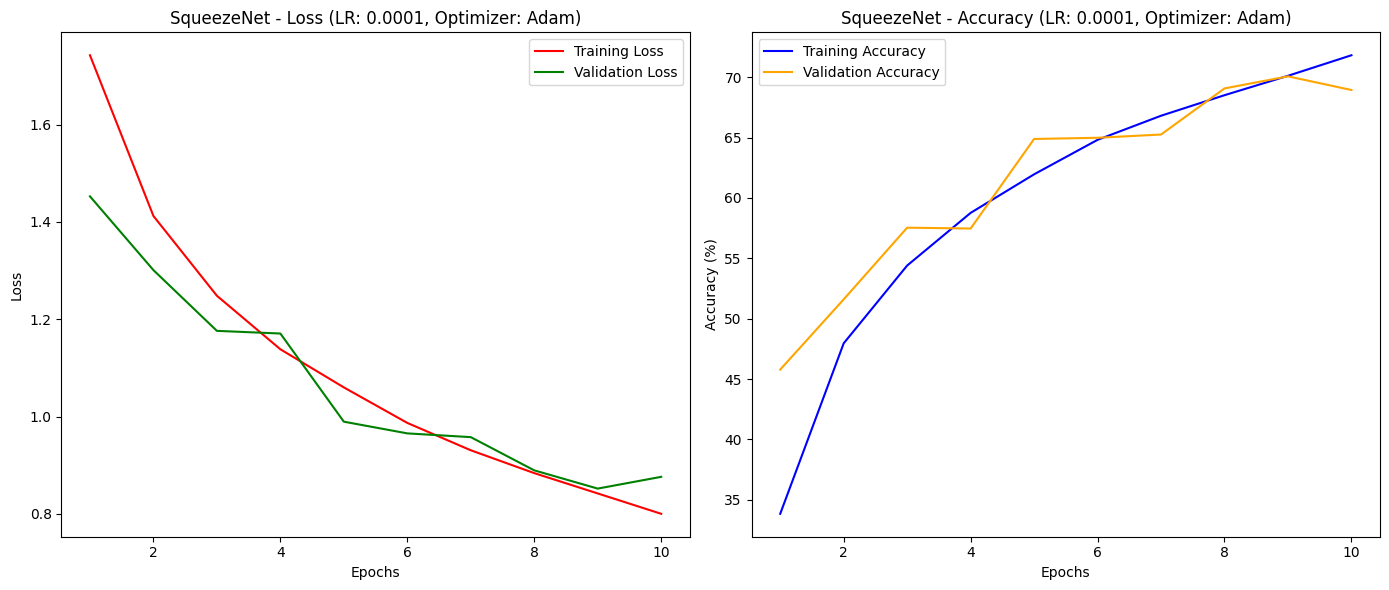


Training SqueezeNet with SGD optimizer and learning rate 0.0001
Epoch 1/10, Train Loss: 2.2933, Train Accuracy: 11.12%, Val Loss: 2.2567, Val Accuracy: 18.63%
Epoch 2/10, Train Loss: 2.0844, Train Accuracy: 21.60%, Val Loss: 1.8644, Val Accuracy: 29.85%
Epoch 3/10, Train Loss: 1.8481, Train Accuracy: 29.83%, Val Loss: 1.7557, Val Accuracy: 35.72%
Epoch 4/10, Train Loss: 1.7433, Train Accuracy: 34.53%, Val Loss: 1.7018, Val Accuracy: 35.70%
Epoch 5/10, Train Loss: 1.6605, Train Accuracy: 38.10%, Val Loss: 1.5736, Val Accuracy: 40.77%
Epoch 6/10, Train Loss: 1.5932, Train Accuracy: 40.91%, Val Loss: 1.5511, Val Accuracy: 42.00%
Epoch 7/10, Train Loss: 1.5366, Train Accuracy: 43.21%, Val Loss: 1.4568, Val Accuracy: 46.22%
Epoch 8/10, Train Loss: 1.4861, Train Accuracy: 45.25%, Val Loss: 1.4882, Val Accuracy: 45.20%
Epoch 9/10, Train Loss: 1.4457, Train Accuracy: 47.08%, Val Loss: 1.4128, Val Accuracy: 48.20%
Epoch 10/10, Train Loss: 1.4023, Train Accuracy: 48.94%, Val Loss: 1.3730, Val A

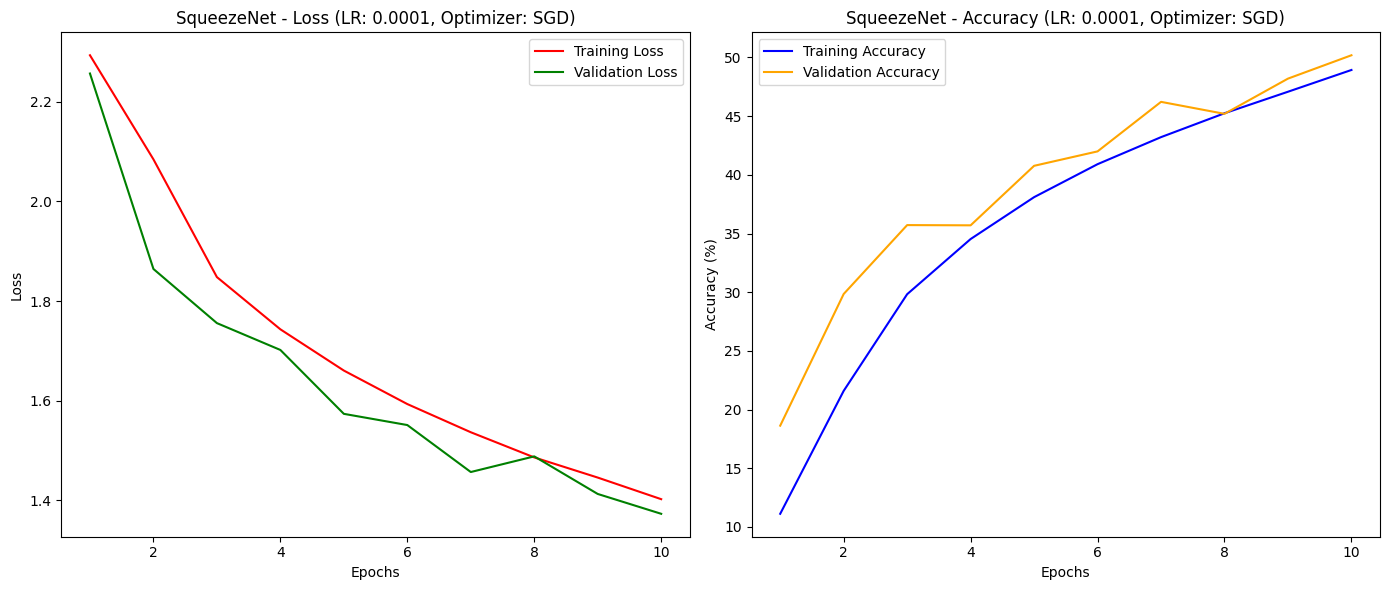


Best Hyperparameters for SqueezeNet:
Optimizer: Adam, Learning Rate: 0.0001
Best Validation Accuracy: 68.95%

Classification Report for SqueezeNet:
              precision    recall  f1-score   support

    airplane       0.59      0.87      0.71      1000
  automobile       0.86      0.84      0.85      1000
        bird       0.66      0.49      0.56      1000
         cat       0.45      0.65      0.53      1000
        deer       0.66      0.63      0.64      1000
         dog       0.68      0.53      0.60      1000
        frog       0.82      0.66      0.73      1000
       horse       0.63      0.82      0.71      1000
        ship       0.91      0.70      0.80      1000
       truck       0.92      0.70      0.80      1000

    accuracy                           0.69     10000
   macro avg       0.72      0.69      0.69     10000
weighted avg       0.72      0.69      0.69     10000



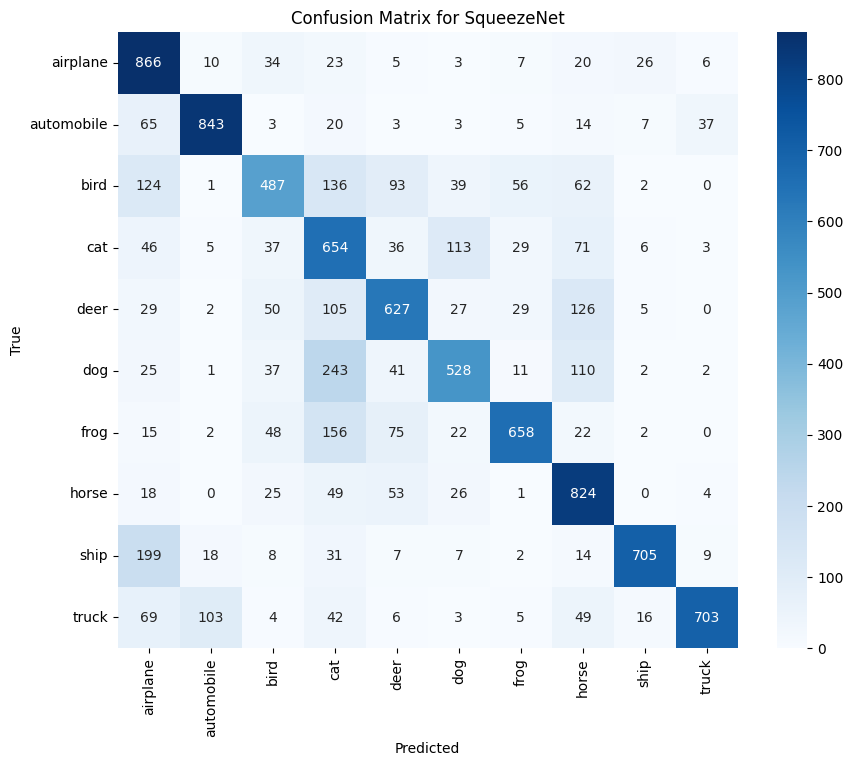

In [ ]:



# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Data loading and preprocessing
transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

learning_rates = [0.001, 0.0001]
optimizers = ['Adam', 'SGD']
best_accuracy = 0.0
best_model = None
best_params = {}

# Training function with validation
def train_model(model, optimizer_name, learning_rate, epochs=10):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate) if optimizer_name == 'Adam' else optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(trainloader)
        epoch_train_acc = 100 * correct / total
        train_loss_history.append(epoch_train_loss)
        train_acc_history.append(epoch_train_acc)

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_val_loss = val_loss / len(testloader)
        epoch_val_acc = 100 * correct / total
        val_loss_history.append(epoch_val_loss)
        val_acc_history.append(epoch_val_acc)

        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_acc:.2f}%, '
              f'Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_acc:.2f}%')

    return model, train_loss_history, train_acc_history, val_loss_history, val_acc_history

# Plotting function for training and validation history
def plot_curves(train_loss, train_acc, val_loss, val_acc, lr, optimizer_name):
    epochs = range(1, len(train_loss) + 1)
    plt.figure(figsize=(14, 6))

    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'g', label='Validation Loss')
    plt.title(f'SqueezeNet - Loss (LR: {lr}, Optimizer: {optimizer_name})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')
    plt.title(f'SqueezeNet - Accuracy (LR: {lr}, Optimizer: {optimizer_name})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Hyperparameter tuning for SqueezeNet
print("\nHyperparameter tuning for SqueezeNet:")
for lr in learning_rates:
    for opt in optimizers:
        print(f"\nTraining SqueezeNet with {opt} optimizer and learning rate {lr}")
        model = models.squeezenet1_0(pretrained=False)
        model.classifier[1] = nn.Conv2d(512, 10, kernel_size=(1, 1))  # Adjust final layer for CIFAR-10
        trained_model, train_loss, train_acc, val_loss, val_acc = train_model(model, opt, lr)

        if val_acc[-1] > best_accuracy:
            best_accuracy = val_acc[-1]
            best_model = trained_model
            best_params = {'optimizer': opt, 'learning_rate': lr}

        plot_curves(train_loss, train_acc, val_loss, val_acc, lr, opt)

print("\nBest Hyperparameters for SqueezeNet:")
print(f"Optimizer: {best_params['optimizer']}, Learning Rate: {best_params['learning_rate']}")
print(f"Best Validation Accuracy: {best_accuracy:.2f}%")

# Evaluate the best model on the test set
best_model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Classification report
print("\nClassification Report for SqueezeNet:")
print(classification_report(y_true, y_pred, target_names=testset.classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=testset.classes, yticklabels=testset.classes)
plt.title('Confusion Matrix for SqueezeNet')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Using device: cpu
Files already downloaded and verified
Files already downloaded and verified

Hyperparameter tuning for AlexNet:

Training AlexNet with Adam optimizer and learning rate 0.001


c:\Users\vidhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vidhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 1.8626, Train Accuracy: 29.97%, Val Loss: 1.6106, Val Accuracy: 39.76%
Epoch 2/10, Train Loss: 1.6256, Train Accuracy: 39.50%, Val Loss: 1.5671, Val Accuracy: 42.02%
Epoch 3/10, Train Loss: 1.5362, Train Accuracy: 43.36%, Val Loss: 1.5564, Val Accuracy: 43.18%
Epoch 4/10, Train Loss: 1.4848, Train Accuracy: 45.45%, Val Loss: 1.4379, Val Accuracy: 47.39%
Epoch 5/10, Train Loss: 1.4498, Train Accuracy: 46.79%, Val Loss: 1.4312, Val Accuracy: 48.40%
Epoch 6/10, Train Loss: 1.4127, Train Accuracy: 48.44%, Val Loss: 1.3532, Val Accuracy: 51.08%
Epoch 7/10, Train Loss: 1.3857, Train Accuracy: 49.68%, Val Loss: 1.4159, Val Accuracy: 49.19%
Epoch 8/10, Train Loss: 1.3590, Train Accuracy: 50.53%, Val Loss: 1.3360, Val Accuracy: 51.16%
Epoch 9/10, Train Loss: 1.3461, Train Accuracy: 51.61%, Val Loss: 1.3156, Val Accuracy: 51.82%
Epoch 10/10, Train Loss: 1.3200, Train Accuracy: 52.50%, Val Loss: 1.2834, Val Accuracy: 53.81%


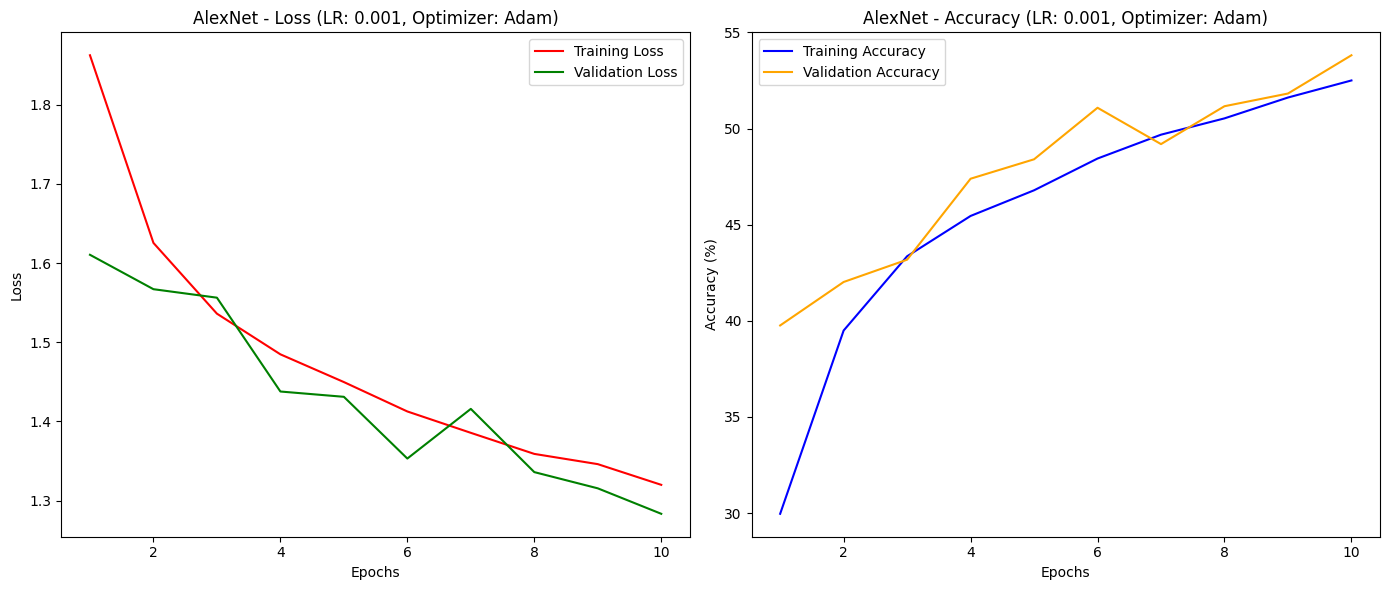


Training AlexNet with SGD optimizer and learning rate 0.001
Epoch 1/10, Train Loss: 2.3011, Train Accuracy: 10.89%, Val Loss: 2.2924, Val Accuracy: 11.55%
Epoch 2/10, Train Loss: 1.9839, Train Accuracy: 23.95%, Val Loss: 1.7262, Val Accuracy: 35.46%
Epoch 3/10, Train Loss: 1.6147, Train Accuracy: 38.81%, Val Loss: 1.4245, Val Accuracy: 47.03%
Epoch 4/10, Train Loss: 1.3623, Train Accuracy: 49.36%, Val Loss: 1.2246, Val Accuracy: 55.09%
Epoch 5/10, Train Loss: 1.1786, Train Accuracy: 57.05%, Val Loss: 1.1089, Val Accuracy: 60.58%
Epoch 6/10, Train Loss: 1.0366, Train Accuracy: 62.72%, Val Loss: 0.9602, Val Accuracy: 66.63%
Epoch 7/10, Train Loss: 0.9096, Train Accuracy: 67.70%, Val Loss: 0.8371, Val Accuracy: 71.14%
Epoch 8/10, Train Loss: 0.8017, Train Accuracy: 71.76%, Val Loss: 0.8056, Val Accuracy: 72.33%
Epoch 9/10, Train Loss: 0.7160, Train Accuracy: 74.81%, Val Loss: 0.7553, Val Accuracy: 73.66%
Epoch 10/10, Train Loss: 0.6441, Train Accuracy: 77.54%, Val Loss: 0.7041, Val Accur

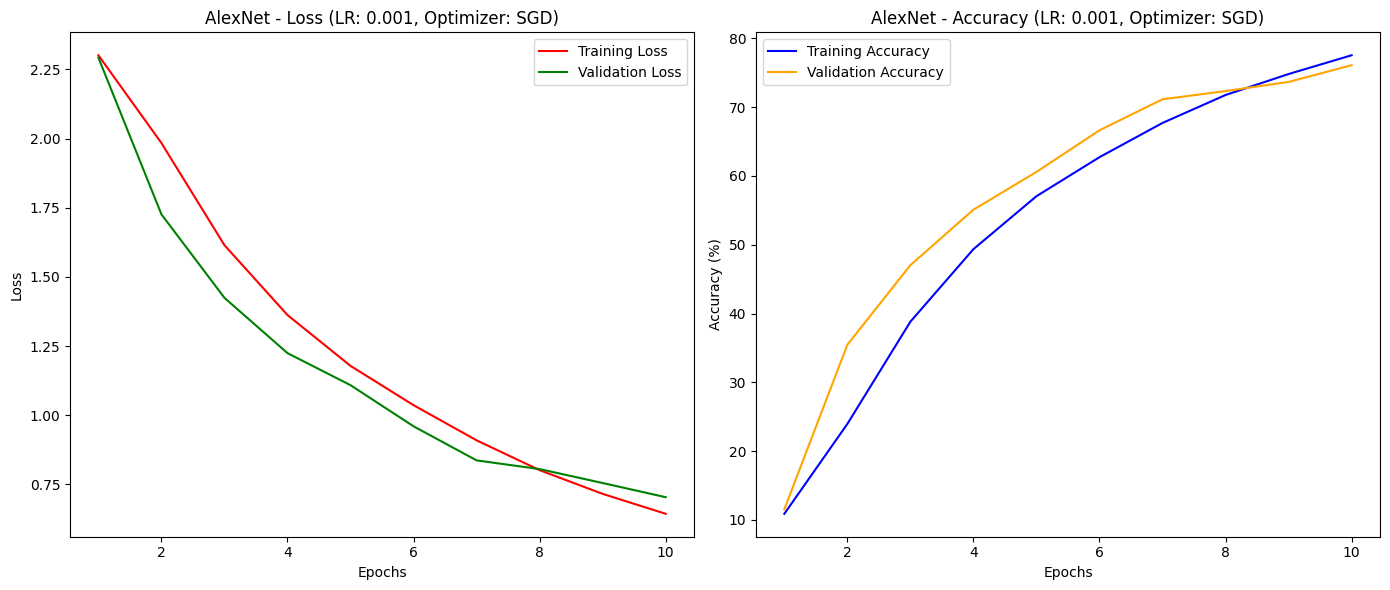


Training AlexNet with Adam optimizer and learning rate 0.0001
Epoch 1/10, Train Loss: 1.4861, Train Accuracy: 44.51%, Val Loss: 1.1645, Val Accuracy: 57.49%
Epoch 2/10, Train Loss: 1.0010, Train Accuracy: 64.47%, Val Loss: 0.8827, Val Accuracy: 68.57%
Epoch 3/10, Train Loss: 0.7740, Train Accuracy: 72.71%, Val Loss: 0.8225, Val Accuracy: 71.35%
Epoch 4/10, Train Loss: 0.6323, Train Accuracy: 77.80%, Val Loss: 0.6786, Val Accuracy: 76.98%
Epoch 5/10, Train Loss: 0.5154, Train Accuracy: 82.12%, Val Loss: 0.6537, Val Accuracy: 78.52%
Epoch 6/10, Train Loss: 0.4147, Train Accuracy: 85.57%, Val Loss: 0.6365, Val Accuracy: 79.53%
Epoch 7/10, Train Loss: 0.3220, Train Accuracy: 88.82%, Val Loss: 0.6805, Val Accuracy: 78.93%
Epoch 8/10, Train Loss: 0.2586, Train Accuracy: 90.95%, Val Loss: 0.7201, Val Accuracy: 78.79%
Epoch 9/10, Train Loss: 0.2003, Train Accuracy: 93.07%, Val Loss: 0.7962, Val Accuracy: 79.21%
Epoch 10/10, Train Loss: 0.1639, Train Accuracy: 94.34%, Val Loss: 0.7619, Val Acc

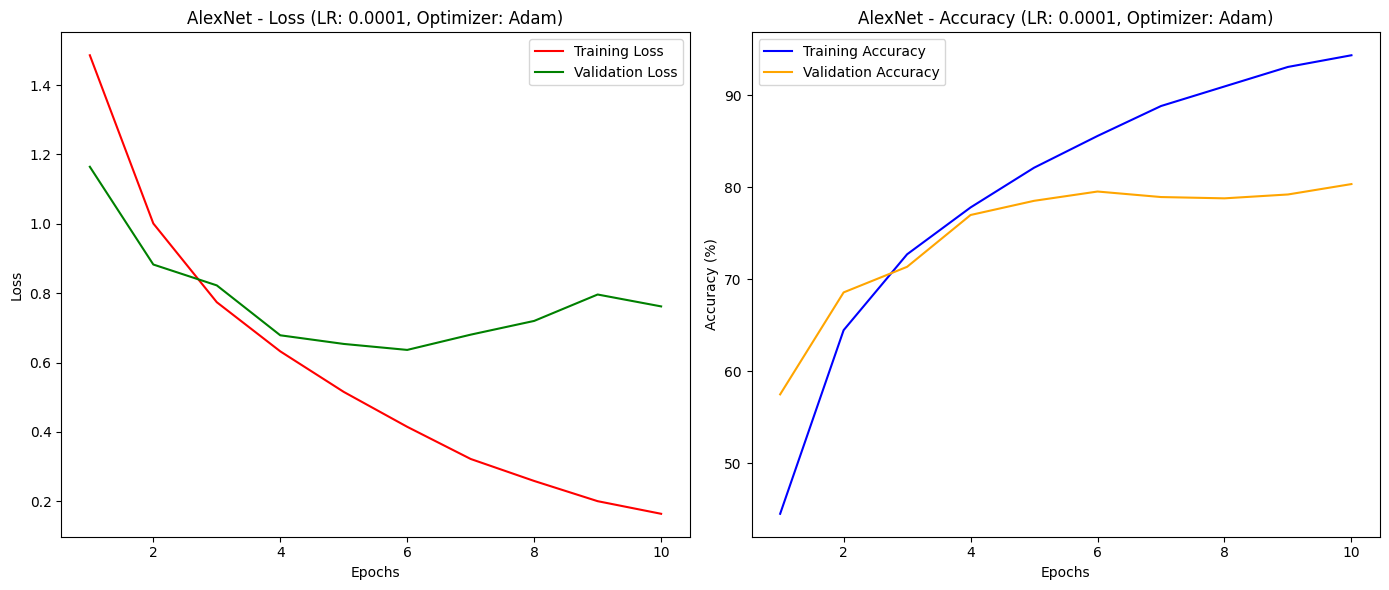


Training AlexNet with SGD optimizer and learning rate 0.0001
Epoch 1/10, Train Loss: 2.3026, Train Accuracy: 10.07%, Val Loss: 2.3025, Val Accuracy: 10.00%
Epoch 2/10, Train Loss: 2.3025, Train Accuracy: 10.81%, Val Loss: 2.3024, Val Accuracy: 10.00%
Epoch 3/10, Train Loss: 2.3024, Train Accuracy: 11.26%, Val Loss: 2.3022, Val Accuracy: 10.59%
Epoch 4/10, Train Loss: 2.3023, Train Accuracy: 12.25%, Val Loss: 2.3021, Val Accuracy: 18.63%
Epoch 5/10, Train Loss: 2.3021, Train Accuracy: 12.65%, Val Loss: 2.3019, Val Accuracy: 16.10%
Epoch 6/10, Train Loss: 2.3020, Train Accuracy: 13.10%, Val Loss: 2.3016, Val Accuracy: 15.33%
Epoch 7/10, Train Loss: 2.3017, Train Accuracy: 12.87%, Val Loss: 2.3013, Val Accuracy: 13.35%
Epoch 8/10, Train Loss: 2.3014, Train Accuracy: 12.65%, Val Loss: 2.3008, Val Accuracy: 12.17%
Epoch 9/10, Train Loss: 2.3010, Train Accuracy: 12.26%, Val Loss: 2.3002, Val Accuracy: 13.05%
Epoch 10/10, Train Loss: 2.3003, Train Accuracy: 11.51%, Val Loss: 2.2991, Val Accu

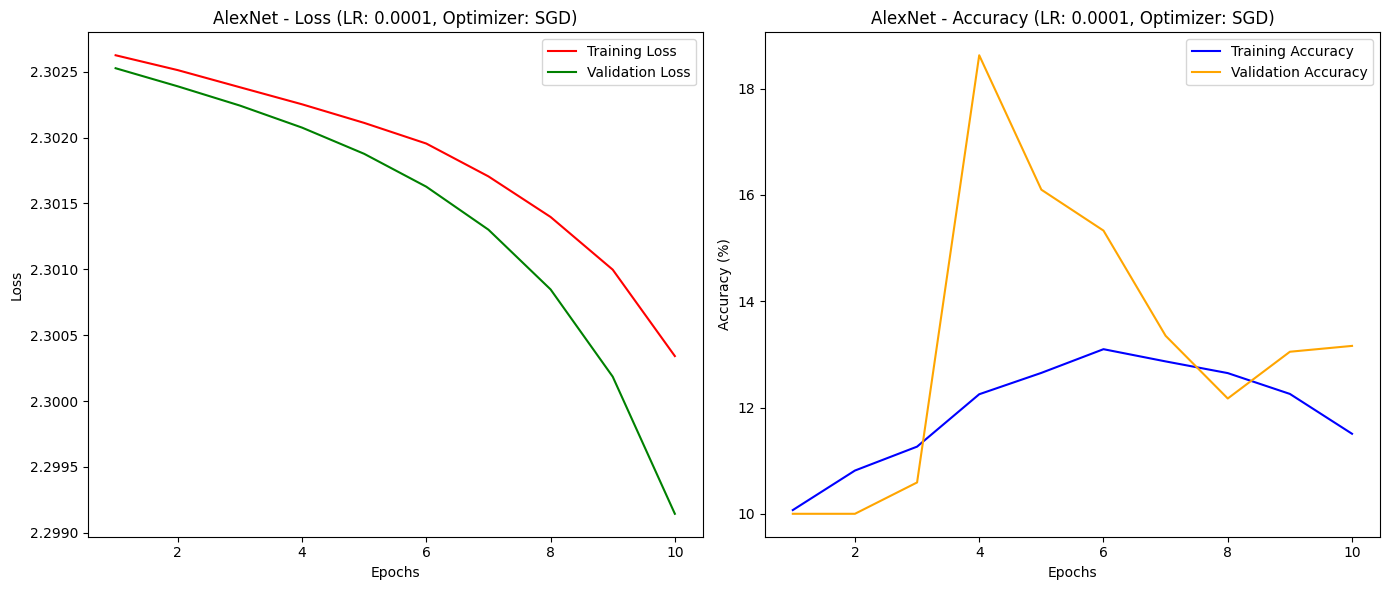


Best Hyperparameters for AlexNet:
Optimizer: Adam, Learning Rate: 0.0001
Best Validation Accuracy: 80.34%

Classification Report for AlexNet:
              precision    recall  f1-score   support

    airplane       0.80      0.83      0.81      1000
  automobile       0.91      0.87      0.89      1000
        bird       0.73      0.74      0.73      1000
         cat       0.67      0.61      0.64      1000
        deer       0.78      0.81      0.79      1000
         dog       0.74      0.67      0.71      1000
        frog       0.83      0.86      0.85      1000
       horse       0.86      0.84      0.85      1000
        ship       0.88      0.89      0.89      1000
       truck       0.83      0.89      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



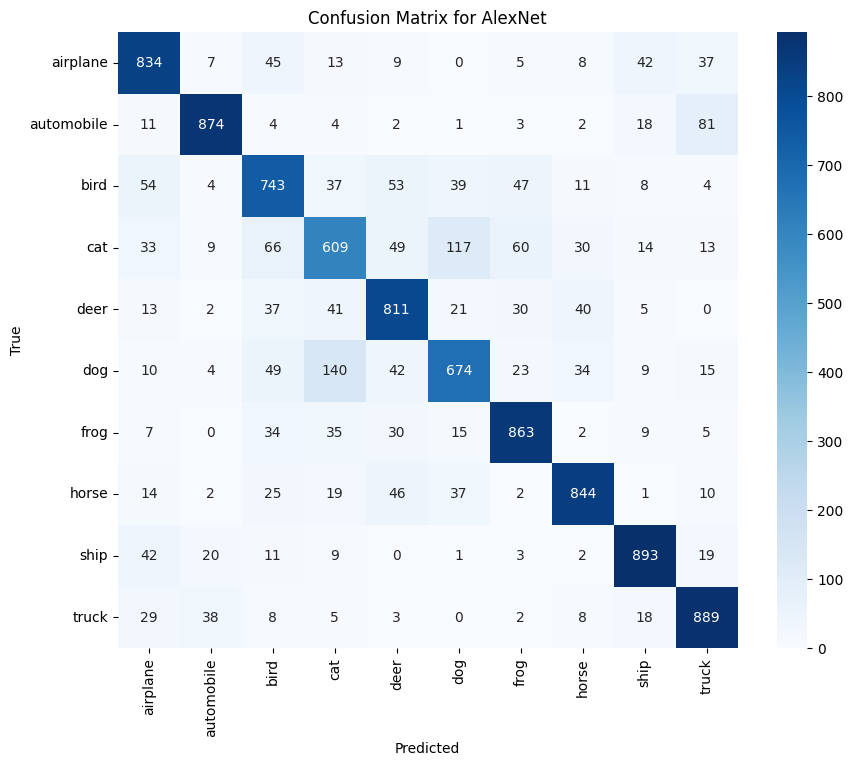

In [ ]:



# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Data loading and preprocessing
transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

learning_rates = [0.001, 0.0001]
optimizers = ['Adam', 'SGD']
best_accuracy = 0.0
best_model = None
best_params = {}

# Training function with validation
def train_model(model, optimizer_name, learning_rate, epochs=10):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate) if optimizer_name == 'Adam' else optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(trainloader)
        epoch_train_acc = 100 * correct / total
        train_loss_history.append(epoch_train_loss)
        train_acc_history.append(epoch_train_acc)

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_val_loss = val_loss / len(testloader)
        epoch_val_acc = 100 * correct / total
        val_loss_history.append(epoch_val_loss)
        val_acc_history.append(epoch_val_acc)

        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_acc:.2f}%, '
              f'Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_acc:.2f}%')

    return model, train_loss_history, train_acc_history, val_loss_history, val_acc_history

# Plotting function for training and validation history
def plot_curves(train_loss, train_acc, val_loss, val_acc, lr, optimizer_name):
    epochs = range(1, len(train_loss) + 1)
    plt.figure(figsize=(14, 6))

    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'g', label='Validation Loss')
    plt.title(f'AlexNet - Loss (LR: {lr}, Optimizer: {optimizer_name})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')
    plt.title(f'AlexNet - Accuracy (LR: {lr}, Optimizer: {optimizer_name})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Hyperparameter tuning for AlexNet
print("\nHyperparameter tuning for AlexNet:")
for lr in learning_rates:
    for opt in optimizers:
        print(f"\nTraining AlexNet with {opt} optimizer and learning rate {lr}")
        model = models.alexnet(pretrained=False)
        model.classifier[6] = nn.Linear(4096, 10)  # Adjust final layer for CIFAR-10
        trained_model, train_loss, train_acc, val_loss, val_acc = train_model(model, opt, lr)

        if val_acc[-1] > best_accuracy:
            best_accuracy = val_acc[-1]
            best_model = trained_model
            best_params = {'optimizer': opt, 'learning_rate': lr}

        plot_curves(train_loss, train_acc, val_loss, val_acc, lr, opt)

print("\nBest Hyperparameters for AlexNet:")
print(f"Optimizer: {best_params['optimizer']}, Learning Rate: {best_params['learning_rate']}")
print(f"Best Validation Accuracy: {best_accuracy:.2f}%")

# Evaluate the best model on the test set
best_model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Classification report
print("\nClassification Report for AlexNet:")
print(classification_report(y_true, y_pred, target_names=testset.classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=testset.classes, yticklabels=testset.classes)
plt.title('Confusion Matrix for AlexNet')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
